## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [6]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [8]:
import datetime 

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in model data. 

In [10]:
model_lev_i=-1
select_station = 'SMR'

In [11]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [12]:
models = ['ECHAM-SALSA','NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

## Cases:

In [13]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## LOAD NORESM

## Settings:

In [14]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [15]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [16]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [17]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [18]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

## Variables

In [19]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =[
       'DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'N50','N100',#'N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       #'NNAT_0','NMR00','SIGMA00',
       #'hyam','hybm',
       #'hyai','hybi',
        'NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 

       
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [20]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x

In [21]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
/

In [22]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:11:38,563 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [23]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:11:43,845 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
/

In [24]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [25]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [26]:
dic_ds = {case_mod: ds_comb}

In [27]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [28]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/79)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

In [29]:
ds = ds_comb.sel(time=slice('2012-01-01','2018-12-31')).isel(lev=-1).sel(station='SMR')

In [30]:
ds['time'] = pd.to_datetime(ds['time'])

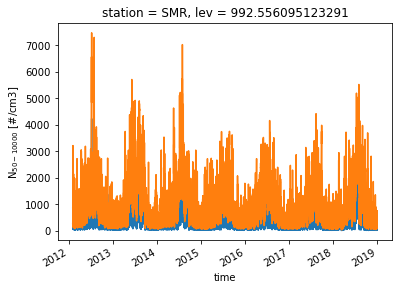

In [31]:
for v in ['N100','N50',]:
    ds[v].plot()

In [32]:
ds = ds_comb.sel(time=slice('2012-01-01','2015-12-31')).isel(lev=-1).sel(station='SMR')

In [33]:
ds['time'] = pd.to_datetime(ds['time'])

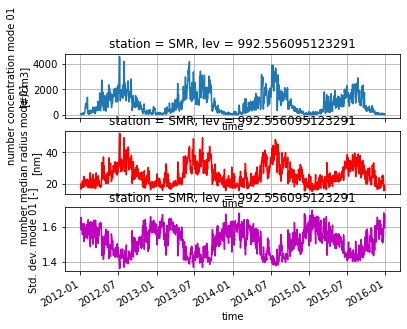

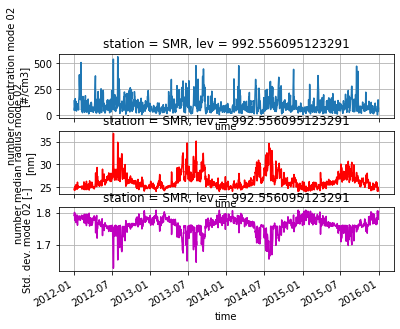

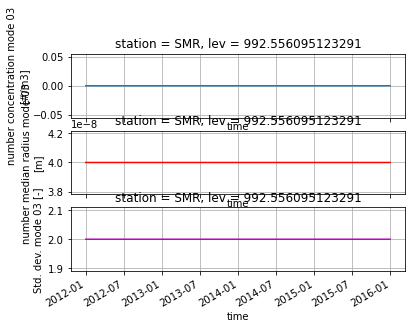

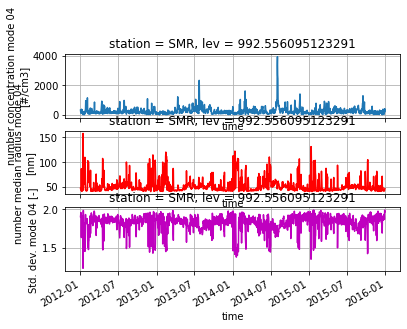

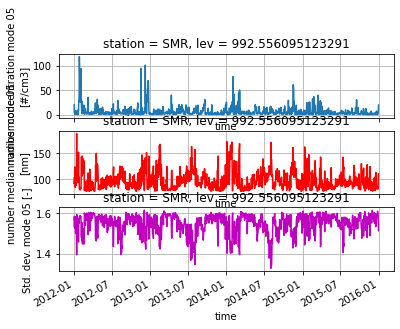

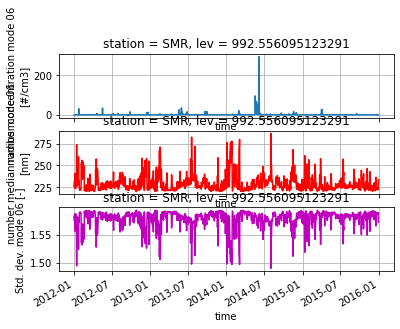

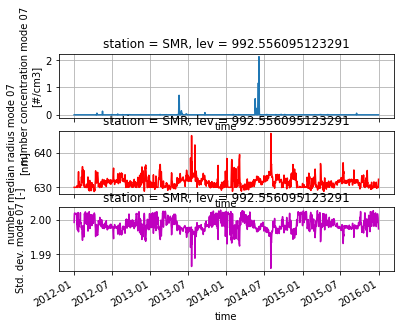

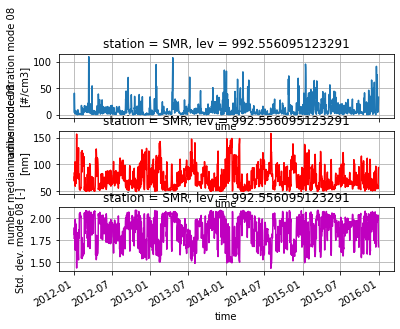

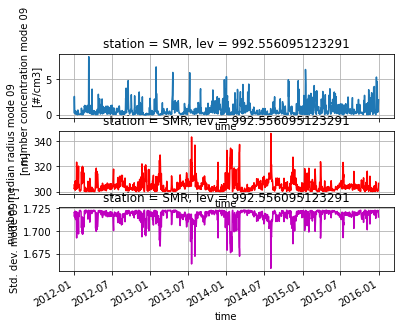

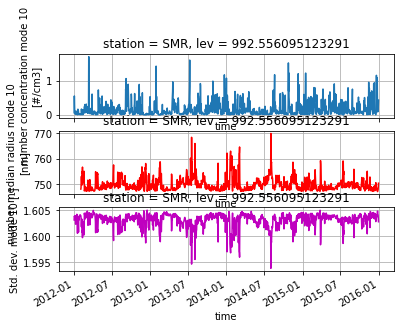

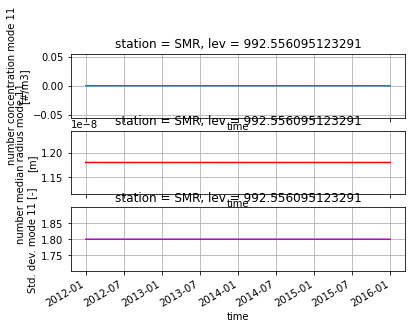

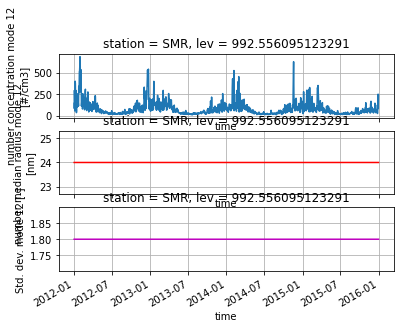

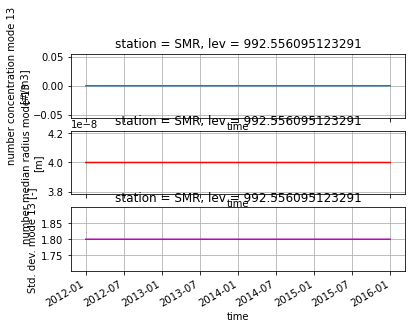

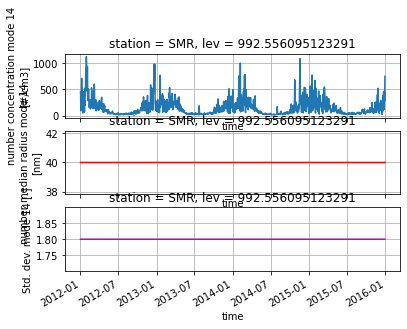

In [34]:
for i in range(1,15):
    vnconc = f'NCONC{i:02d}'
    vnmr = f'NMR{i:02d}'    
    vsig = f'SIGMA{i:02d}'        
    fi, axs = plt.subplots(3,1, sharex=True)
    ds[vnconc].resample(time='1d').mean().plot(ax =axs[0])
    ds[vnmr].resample(time='1d').mean().plot(ax =axs[1], c='r')
    ds[vsig].resample(time='1d').mean().plot(ax =axs[2], c='m')
    for ax in axs:
        ax.grid()
    plt.show()

In [35]:
ds = ds_comb.sel(time=slice('2015-01-01','2018-12-31')).isel(lev=-1).sel(station='SMR')

In [36]:
ds['time'] = pd.to_datetime(ds['time'])

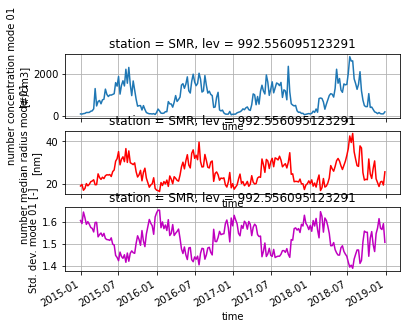

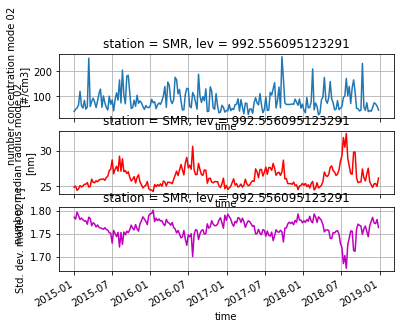

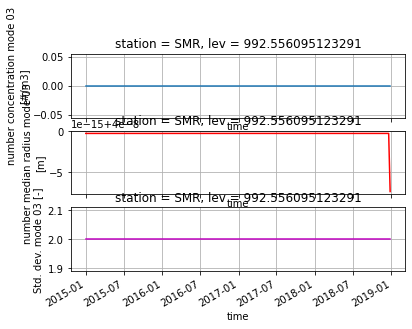

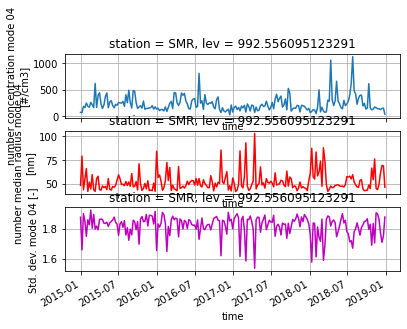

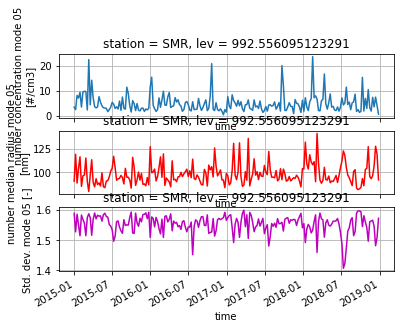

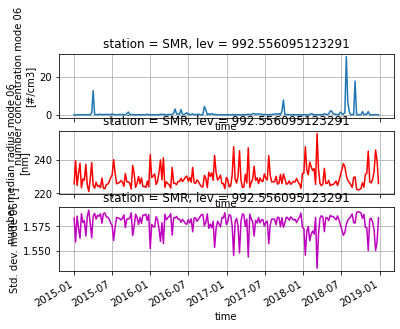

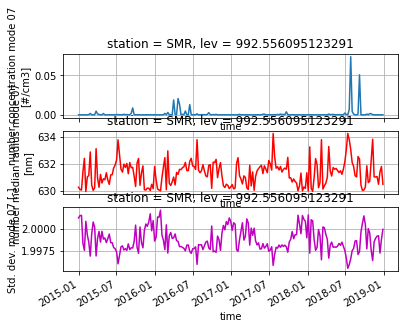

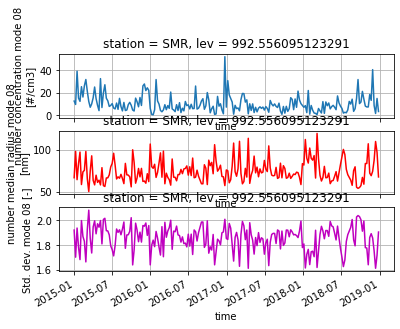

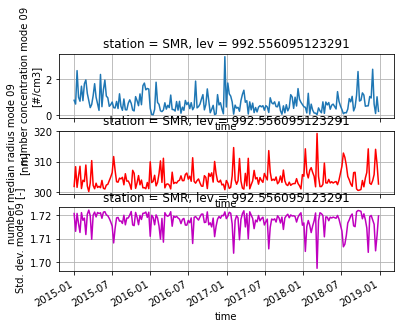

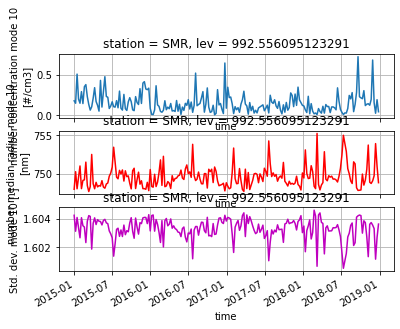

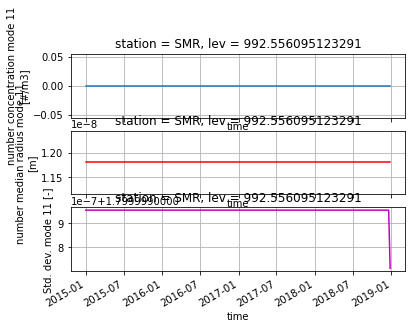

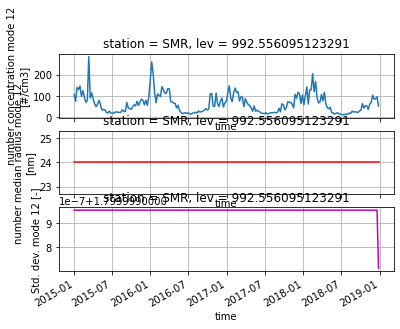

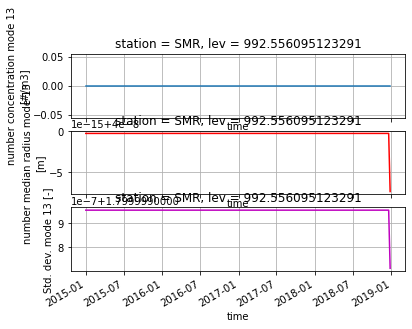

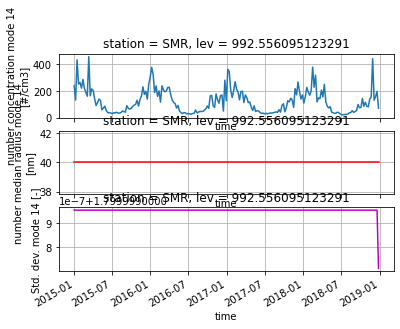

In [37]:
for i in range(1,15):
    vnconc = f'NCONC{i:02d}'
    vnmr = f'NMR{i:02d}'    
    vsig = f'SIGMA{i:02d}'        
    fi, axs = plt.subplots(3,1, sharex=True)
    ds[vnconc].resample(time='7d').mean().plot(ax =axs[0])
    ds[vnmr].resample(time='7d').mean().plot(ax =axs[1], c='r')
    ds[vsig].resample(time='7d').mean().plot(ax =axs[2], c='m')
    for ax in axs:
        ax.grid()
    plt.show()

In [38]:
ds = ds_comb.sel(time=slice('2012-01-01','2018-12-31')).isel(lev=-1).sel(station='SMR')


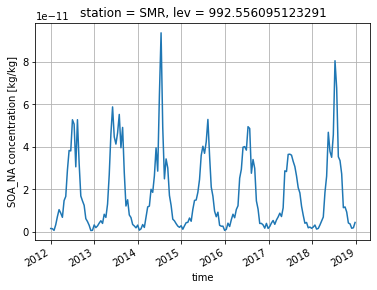

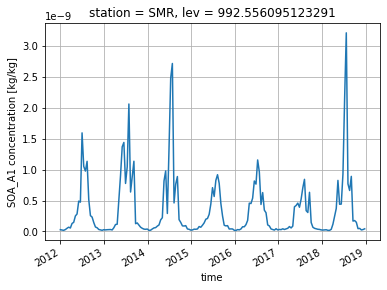

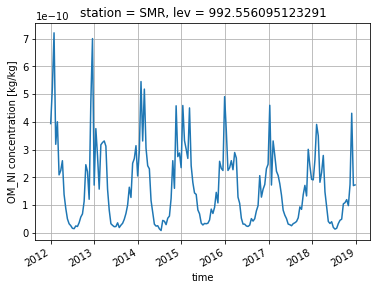

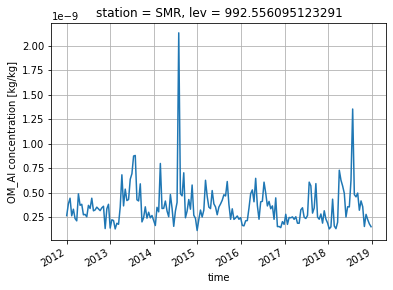

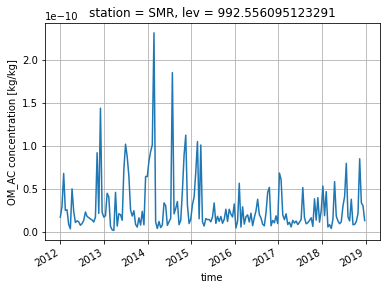

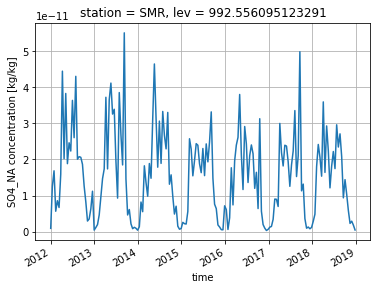

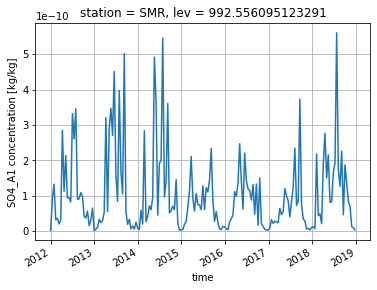

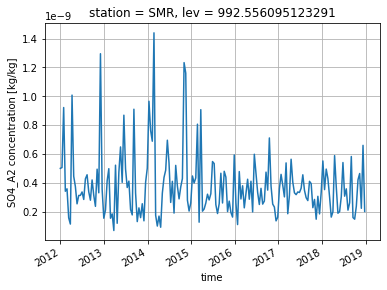

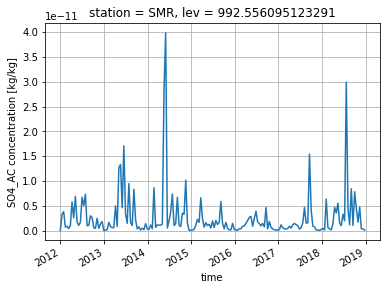

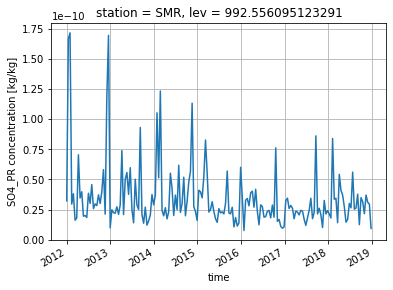

In [39]:
for v in ['SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',]:
 
    ds[v].resample(time='14d').mean().plot()#ax =axs[0])
    plt.grid()
    plt.show()

In [40]:
vars_extra_ns = ['AWNC', 'AREL', 'FREQL', 'ACTNL',
                 #'ACTNI',
                 'ACTREL', 'ACTREI', 'FCTL', 'FCTI', 'CDNUMC', 'CLDTOT', 
                 'TOT_CLD_VISTAU', 'TOT_ICLD_VISTAU', 'TGCLDIWP', 'TGCLDLWP', 'TGCLDCWP', 'FSNT', 'FLNT', 'FSNT_DRF', 'FLNT_DRF', 'FSNTCDRF', 'FLNTCDRF',
                 #'FLNS',
                 'FSNS', 'FLNSC', 'FSNSC', 'FSDSCDRF', 'FSDS_DRF', 'FSUTADRF',
                 #'FLUTC',
                 'FSUS_DRF', 'FLUS', 'CLDFREE', 'AOD_VIS', 'DOD440', 'DOD500', 'DOD550',
                 #'DOD670',
                 'DOD870', 'ABSVIS', 'AEROD_v', 'OD550DRY', 'RHW', 'MMR_AH2O', 'EC550AER', 'DAERH2O', 'D500_POM', 'D500_SO4', 'D500_BC', 'D500_DU', 'D500_SS', 'DER', 'DERGT05', 'DERLT05', 'BETOTVIS', 'ASYMMDRY', 'BS550AER', 'BETOTVIS', 'PMTOT', 'PM2P5', 'PM25', 'SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC', 'SO4_PR', 'SOA_NA', 'SOA_A1', 'BC_N', 'BC_AX', 'BC_NI', 'BC_A', 'BC_AI', 'BC_AC', 'OM_NI', 'OM_AI', 'OM_AC', 'DST_A2', 'DST_A3', 'SS_A1', 'SS_A2', 'SS_A3', 'SOA_LV', 'SOA_SV', 'H2SO4', 'SO2', 'monoterp', 'isoprene', 'DMS', 'SFisoprene', 'SFmonoterp', 'NUCLRATE', 'FORMRATE', 'GRH2SO4', 'GRSOA', 'GR', 'COAGNUCL', 'CCN1', 'CCN2', 'CCN3', 'CCN4', 'CCN5', 'CCN6', 'CCN7', 'CCN_B', 'NNAT_0', 'NCONC01', 'NCONC02', 'NCONC03', 'NCONC04', 'NCONC05', 'NCONC06', 'NCONC07', 'NCONC08', 'NCONC09', 'NCONC10', 'NCONC11', 'NCONC12', 'NCONC13', 'NCONC14', 'SIGMA01', 'SIGMA02', 'SIGMA03', 'SIGMA04', 'SIGMA05', 'SIGMA06', 'SIGMA07', 'SIGMA08', 'SIGMA09', 'SIGMA10', 'SIGMA11', 'SIGMA12', 'SIGMA13', 'SIGMA14', 'NMR01', 'NMR02', 'NMR03', 'NMR04', 'NMR05', 'NMR06', 'NMR07', 'NMR08', 'NMR09', 'NMR10', 'NMR11', 'NMR12', 'NMR13', 'NMR14', 'T', 'PS', 'U', 'V', 'GRIDAREA']



In [41]:
len(vars_extra_ns)

149

In [42]:
len(set(vars_extra_ns))

148

In [43]:
vars_extra_ns = list(set(vars_extra_ns))

In [44]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x

In [45]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
/

In [46]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:14:41,891 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x

In [47]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:14:43,714 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SOA_LV_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
/

In [48]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [49]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [50]:
dic_ds = {case_mod: ds_comb}

In [51]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [52]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/79)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

In [53]:
ds = ds_comb.sel(time=slice('2012-01-01','2018-12-31')).isel(lev=-1).sel(station='SMR')

In [54]:
for case_name in cases_noresm1:
    varlist = vars_extra_ns
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/BC_AI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NCONC06_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NUCLRATE_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/use

In [55]:
for case_name in cases_noresm2:
    varlist = vars_extra_ns# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/BC_AI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NCONC06_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NUCLRATE_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.

In [56]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(vars_extra_ns)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/BC_AI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NCONC06_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NUCLRATE_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/use

2022-11-23 17:14:46,986 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/BC_AI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NCONC06_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/NUCLRATE_OsloAero_intBVOC_f09_f09_mg17_full_2

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/FLNTCDRF_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/CCN7_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/CCN6_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SO4_AC_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/CCN5_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sa

In [57]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(vars_extra_ns)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:14:50,428 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/BC_AI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NCONC06_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NUCLRATE_OsloAero_intBVOC_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/BC_AI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREI_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NCONC06_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/SIGMA03_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/NUCLRATE_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.

In [58]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [59]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [60]:
dic_ds = {case_mod: ds_comb}

In [61]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [62]:
ds_comb

<xarray.Dataset>
Dimensions:          (time: 61345, station: 7, lev: 32)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station          (station) object 'SMR' 'HTM' 'VHL' ... 'ATTO' 'SGP' 'SMR4'
  * lev              (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/148)
    ABSVIS           (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    ACTNL            (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    ACTREI           (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    ACTREL           (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    AEROD_v          (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    AOD_VIS          (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    ...               ...
    TOT_CLD_VISTAU   (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    TOT_ICLD_VISTAU  (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    U                (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    V                (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene         (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp         (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

In [63]:
ds = ds_comb.sel(time=slice('2012-01-01','2018-12-31')).isel(lev=-1).sel(station='SMR')

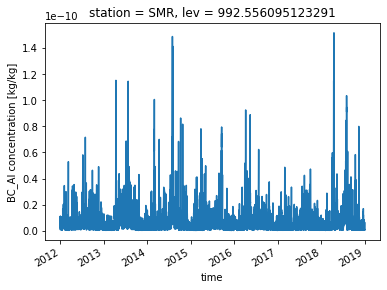

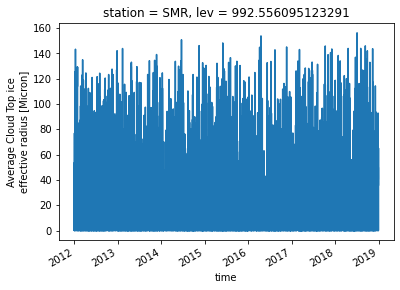

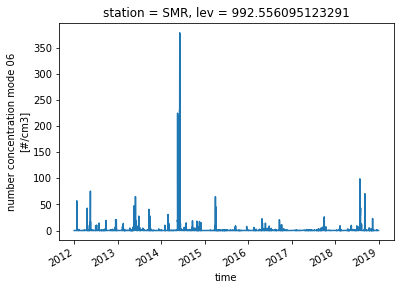

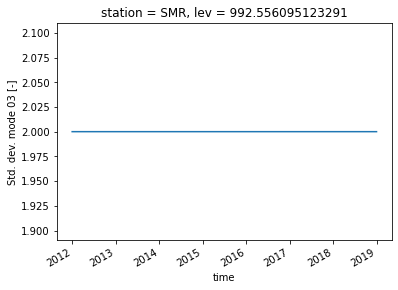

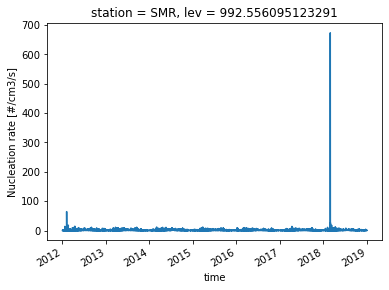

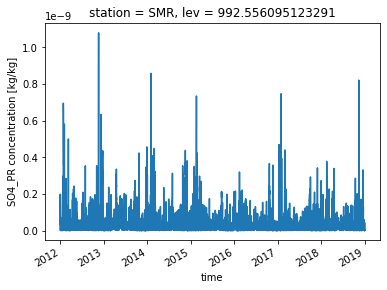

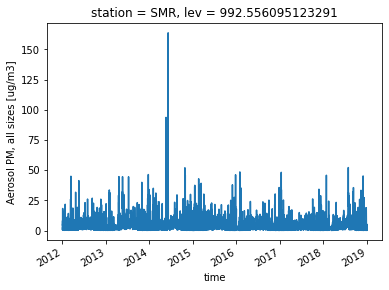

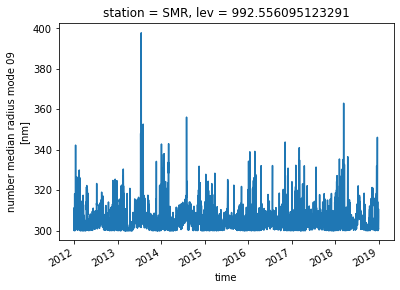

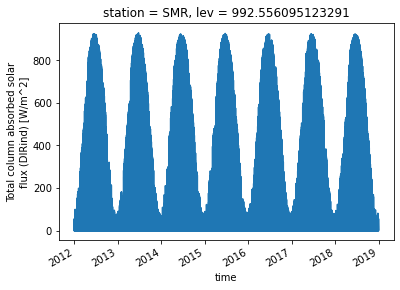

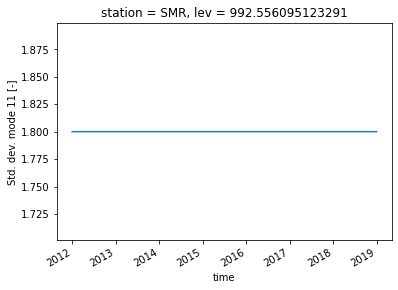

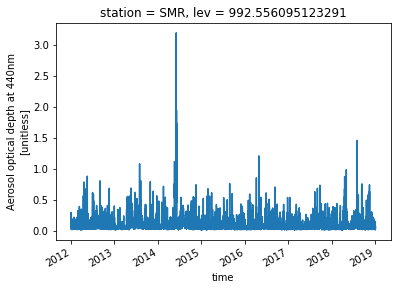

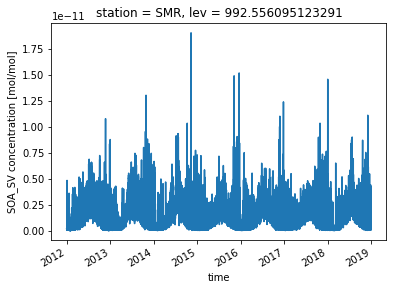

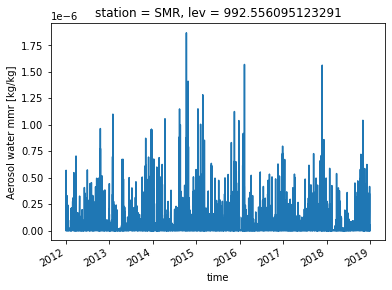

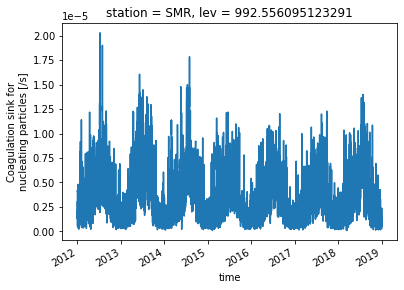

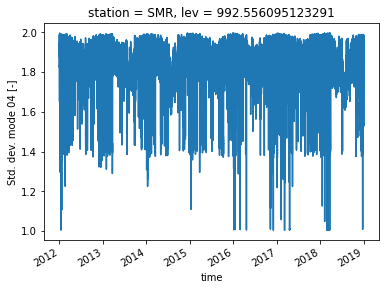

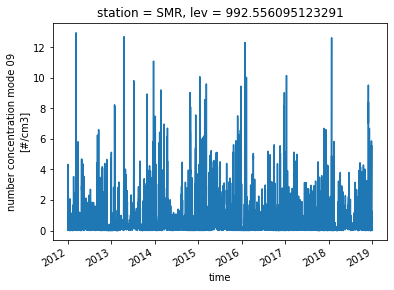

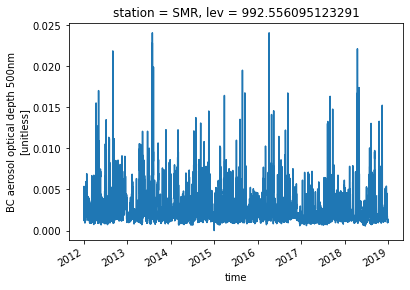

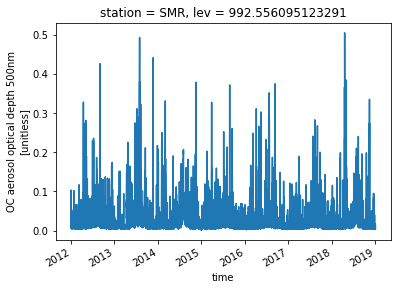

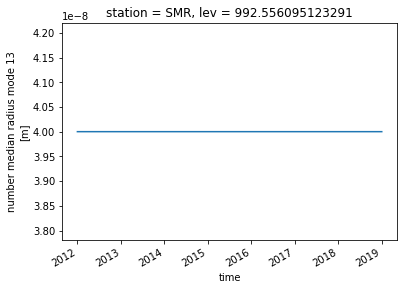

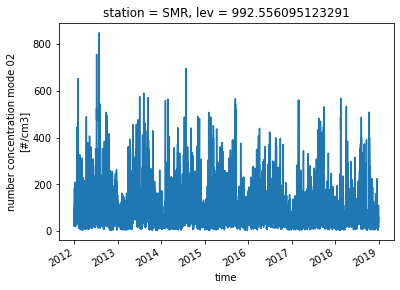

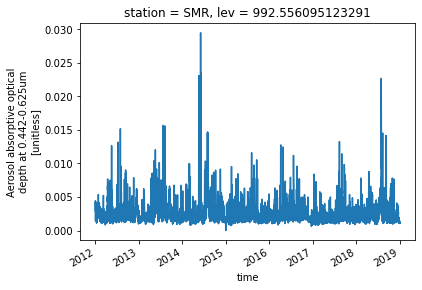

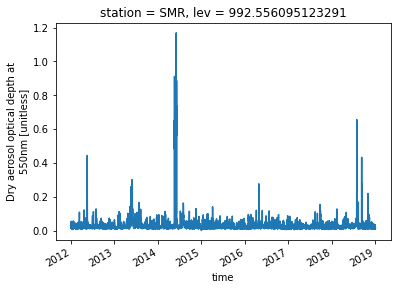

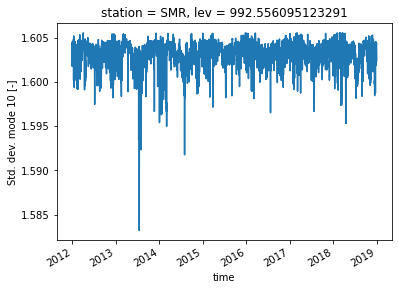

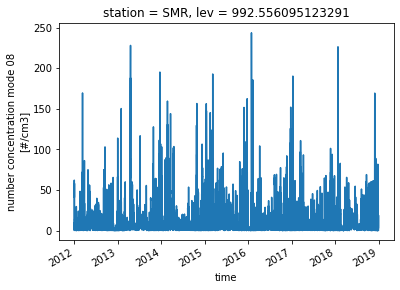

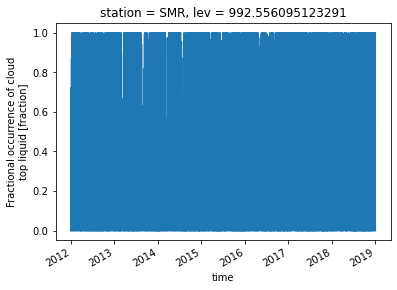

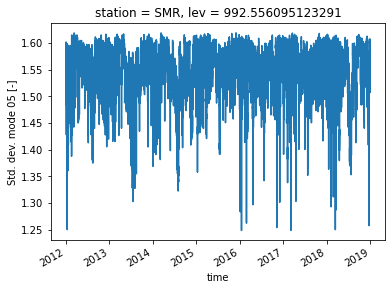

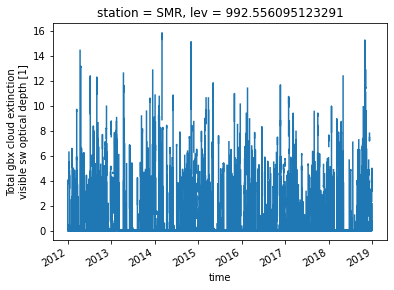

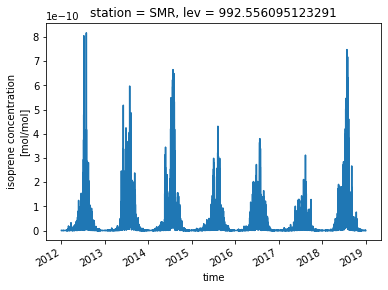

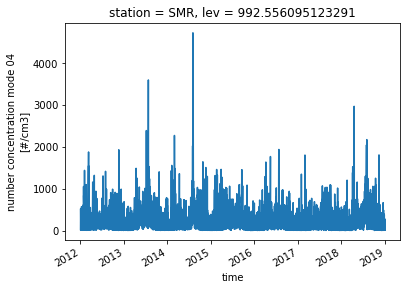

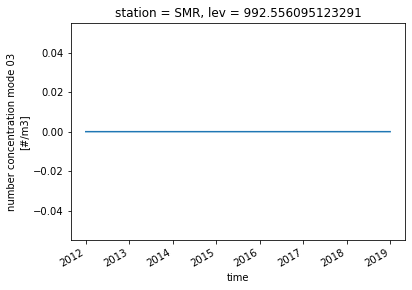

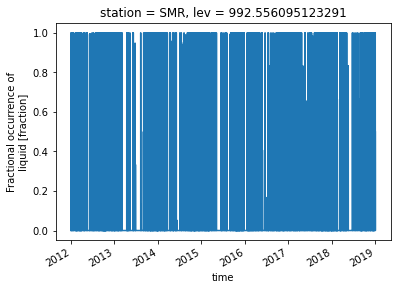

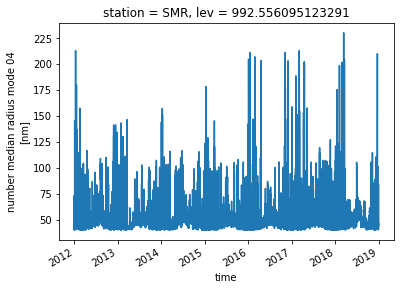

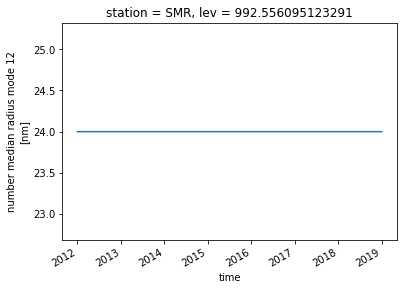

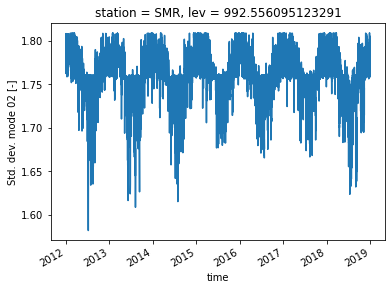

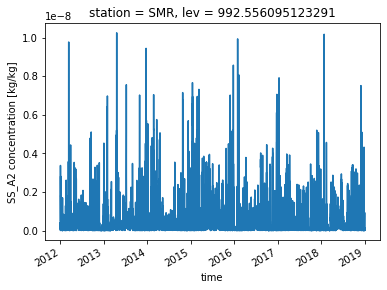

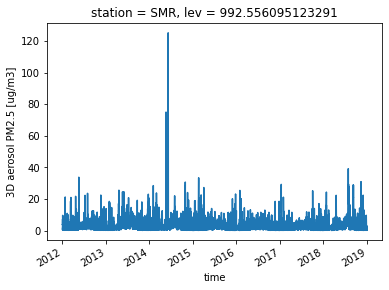

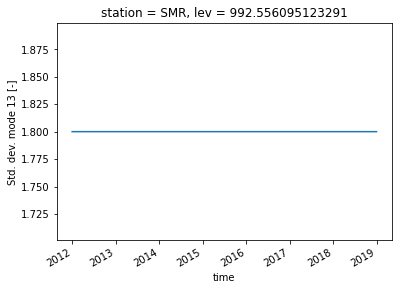

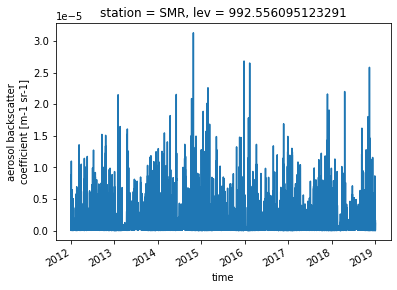

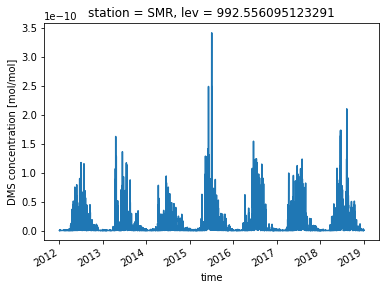

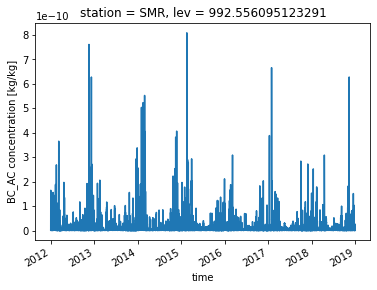

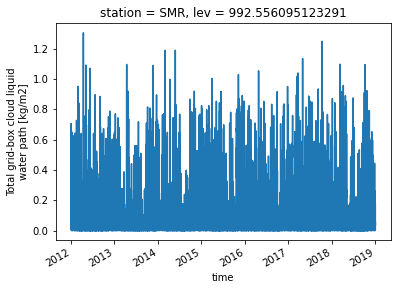

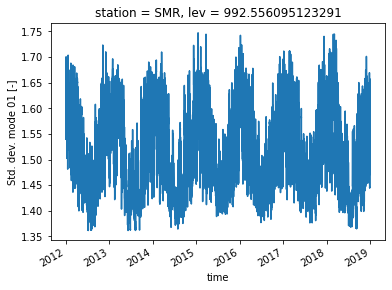

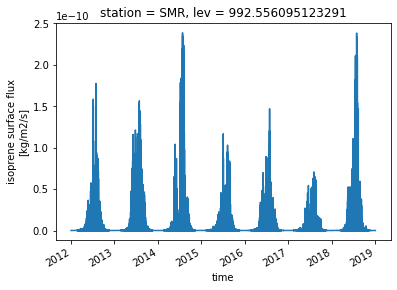

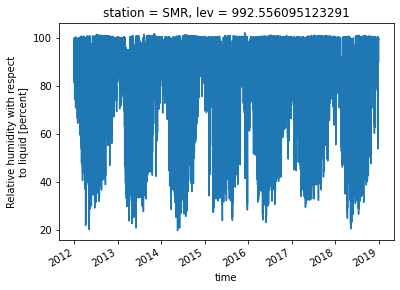

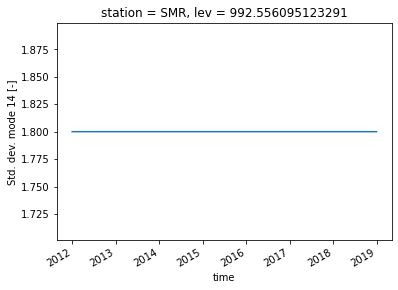

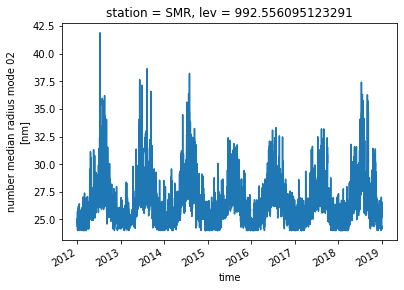

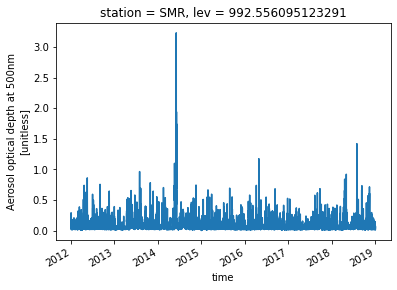

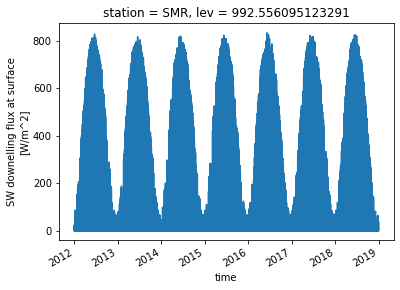

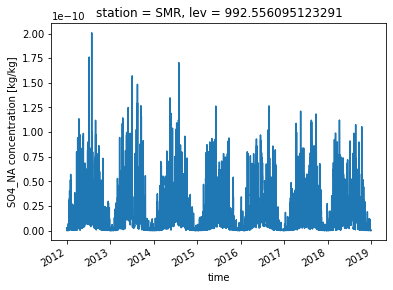

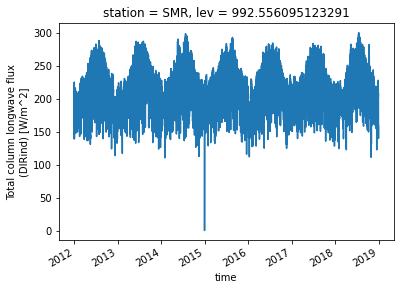

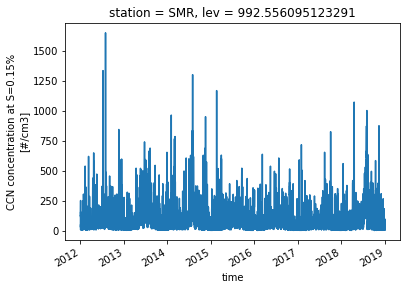

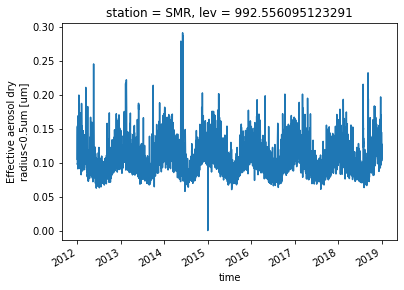

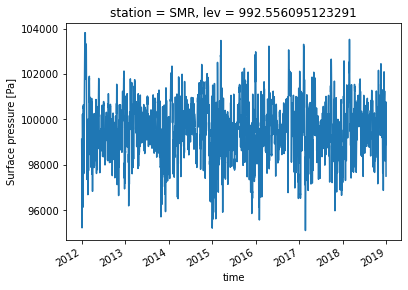

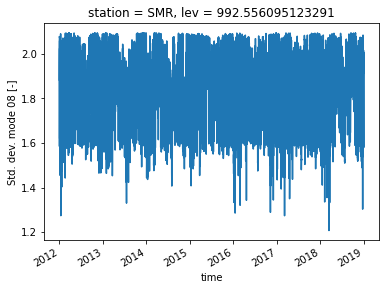

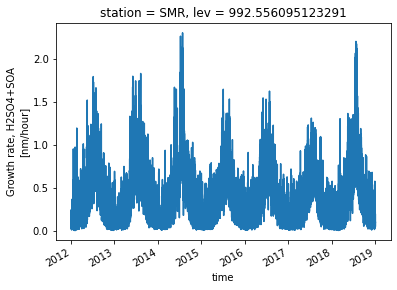

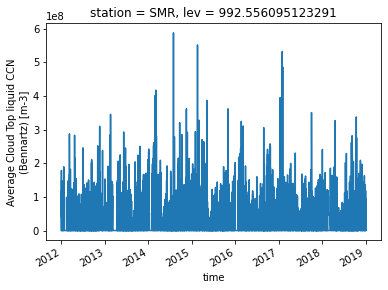

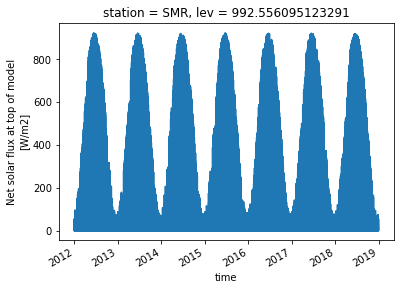

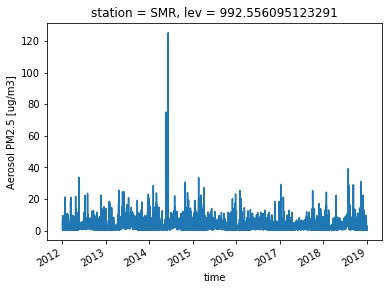

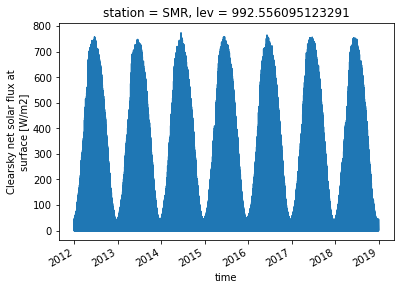

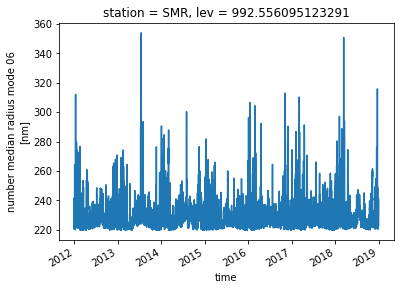

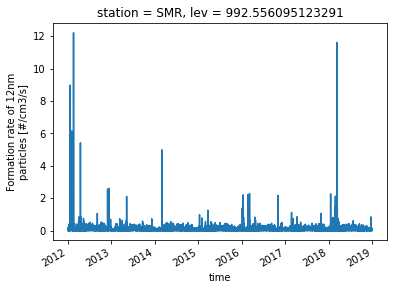

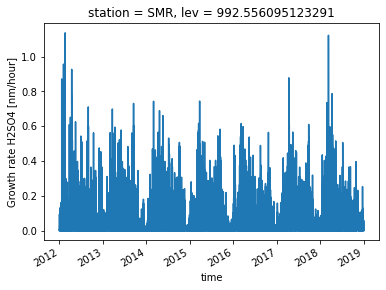

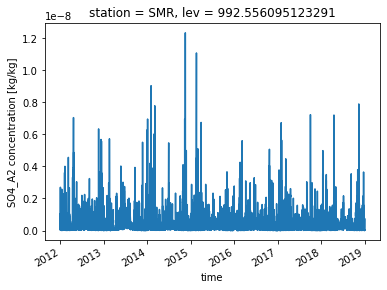

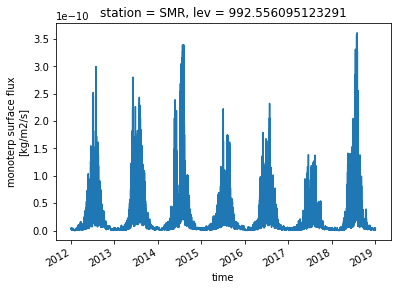

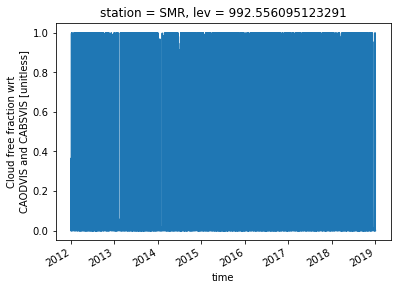

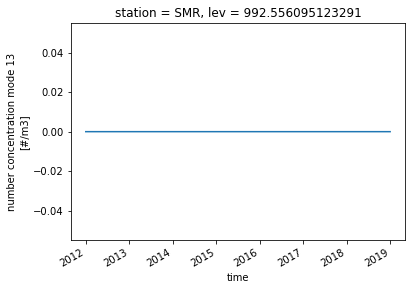

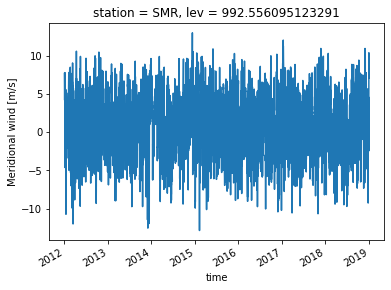

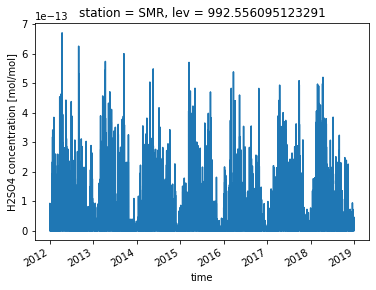

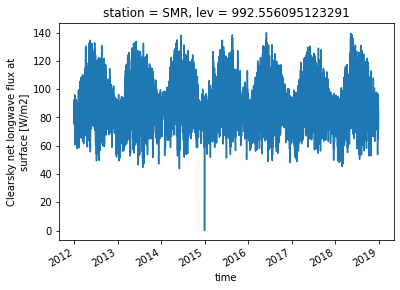

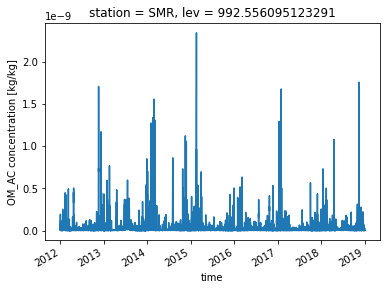

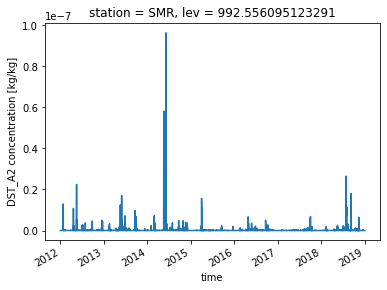

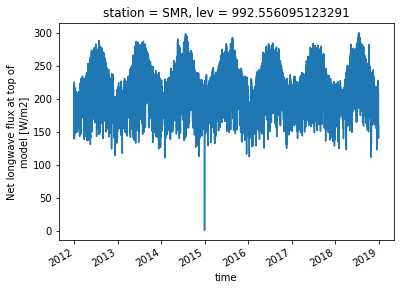

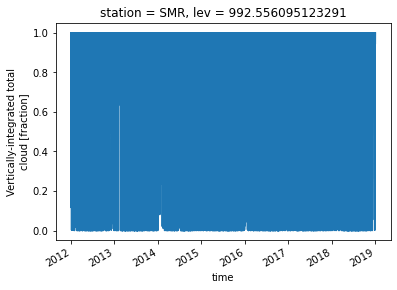

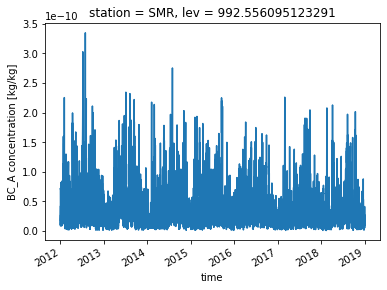

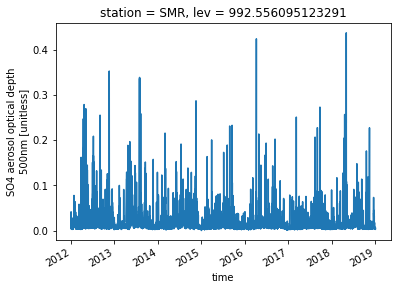

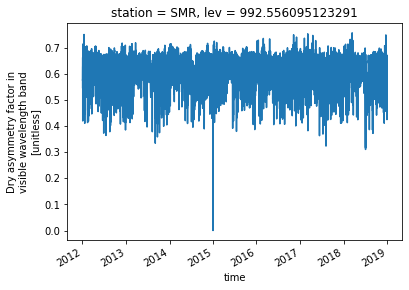

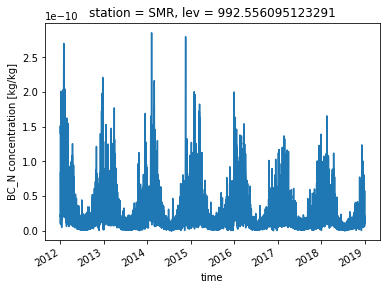

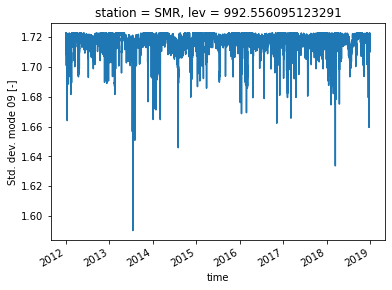

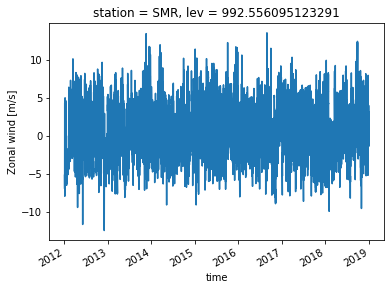

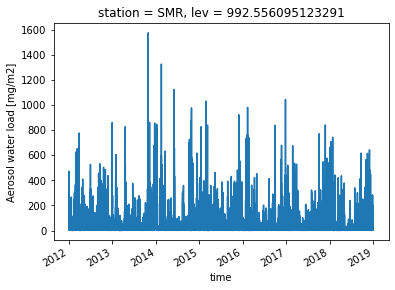

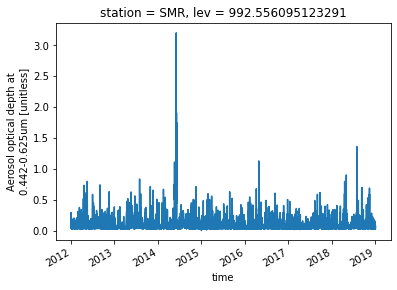

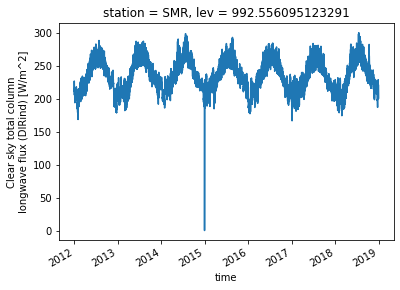

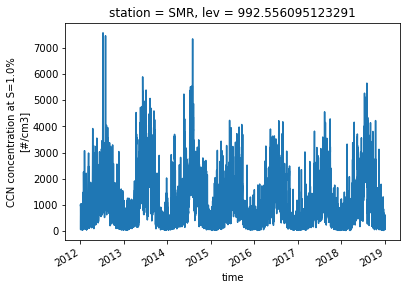

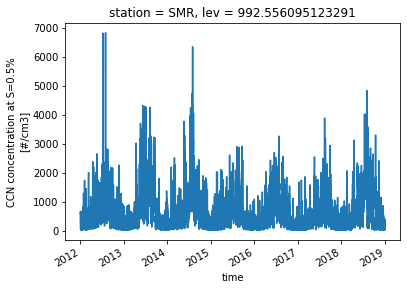

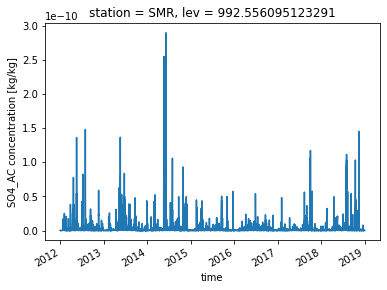

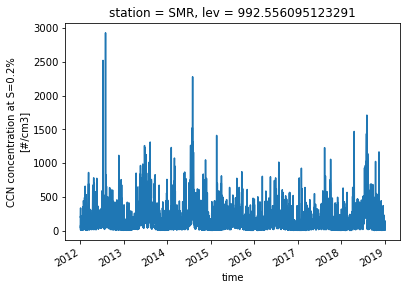

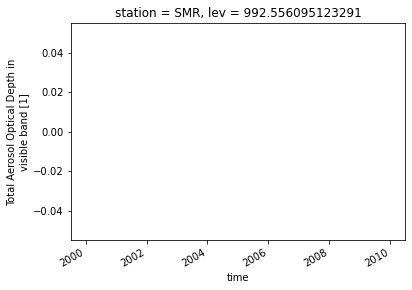

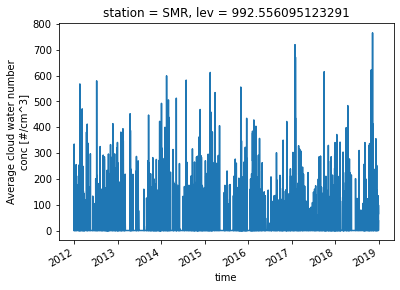

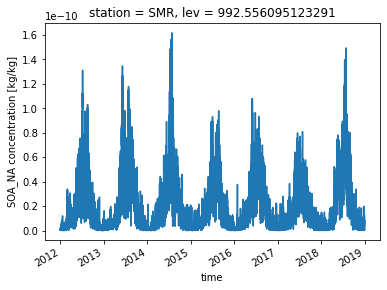

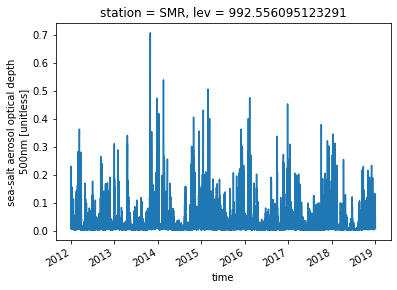

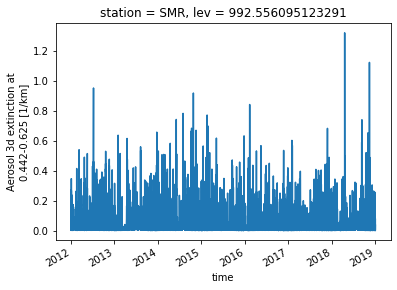

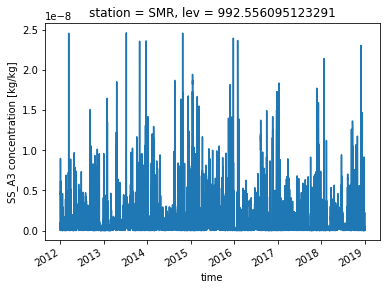

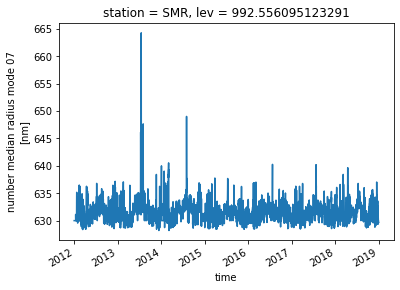

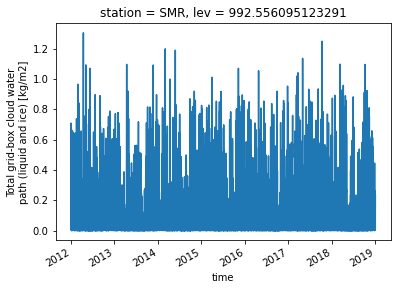

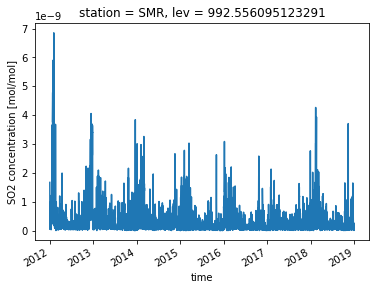

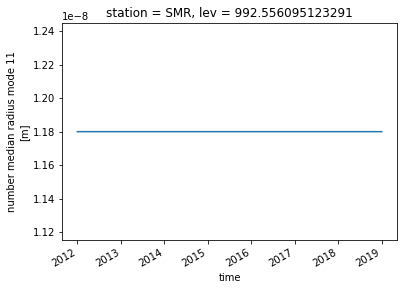

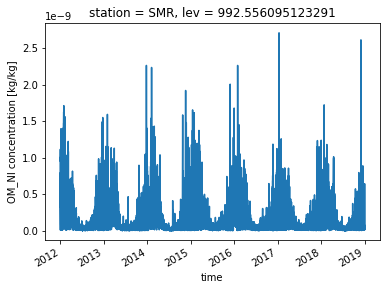

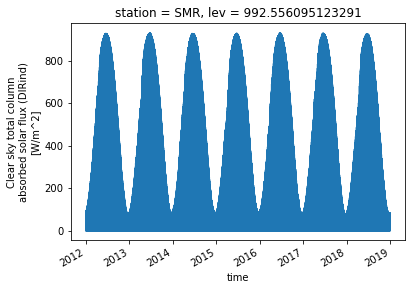

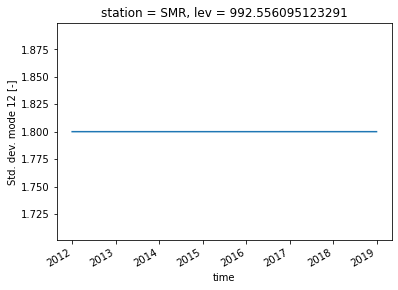

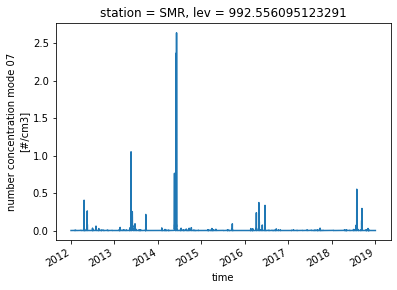

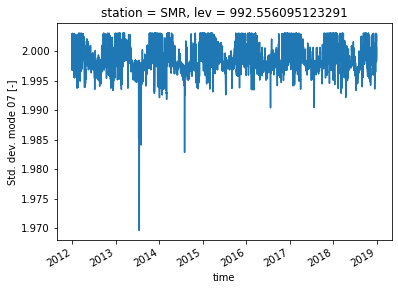

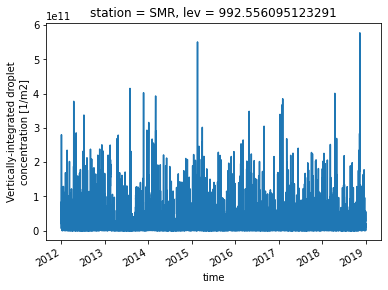

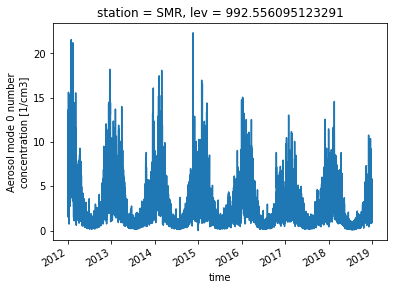

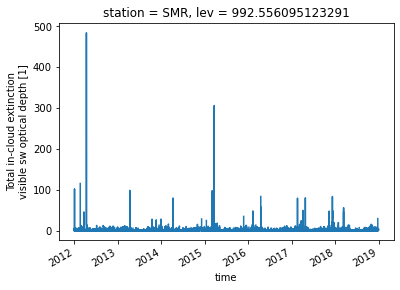

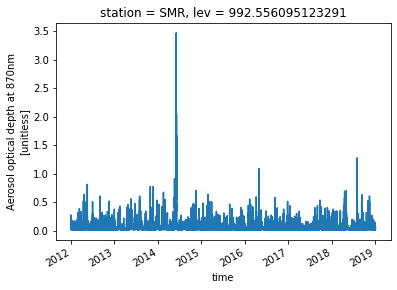

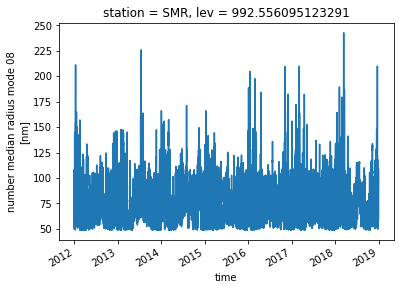

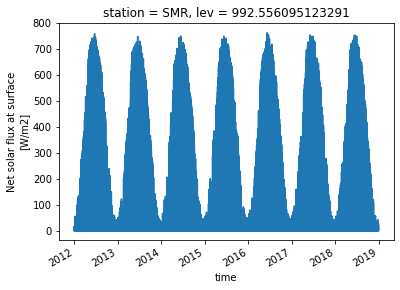

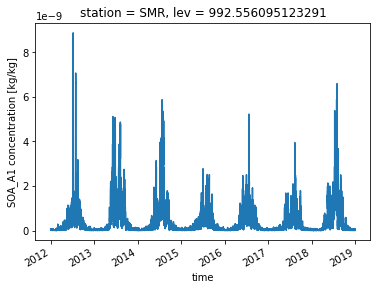

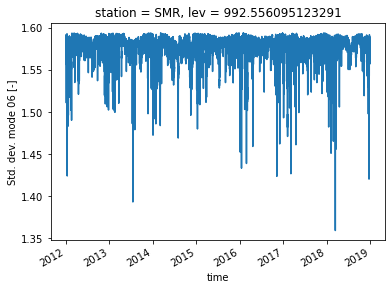

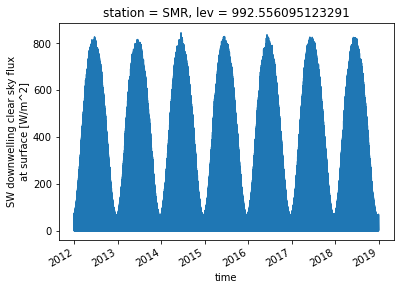

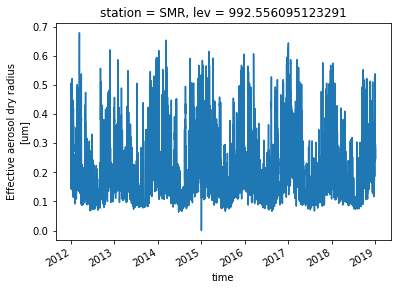

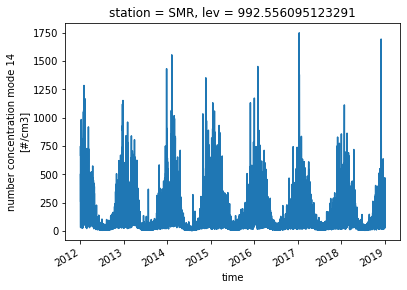

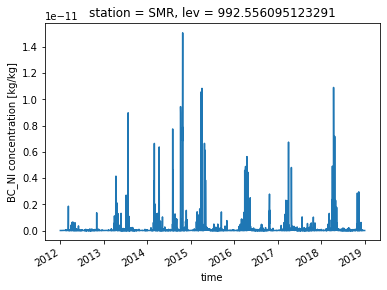

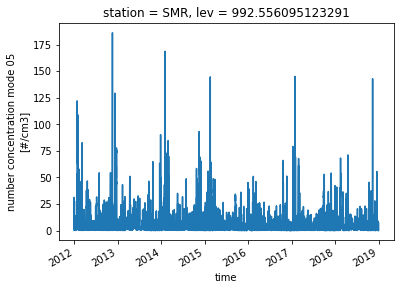

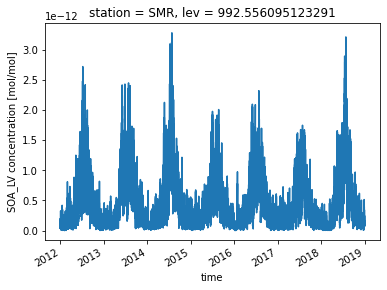

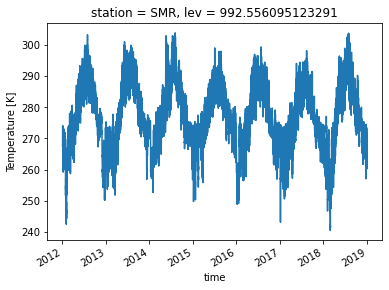

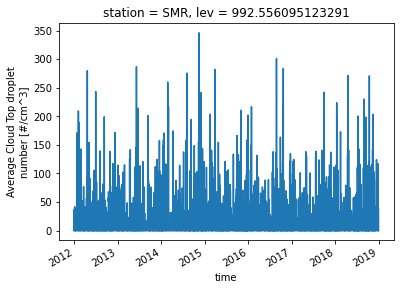

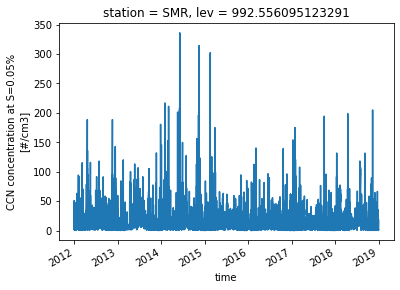

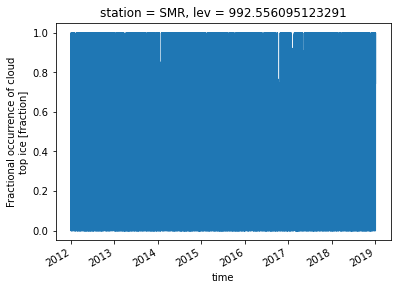

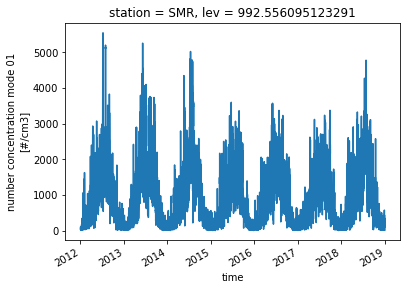

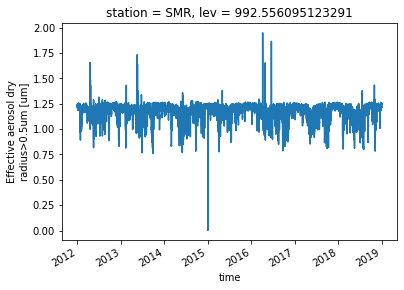

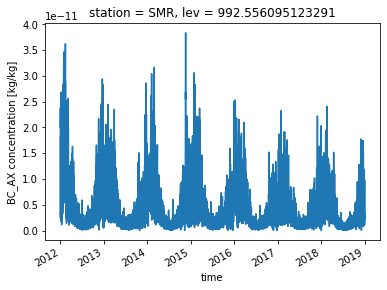

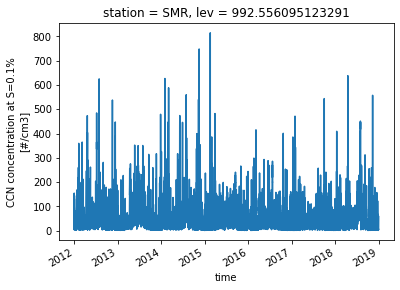

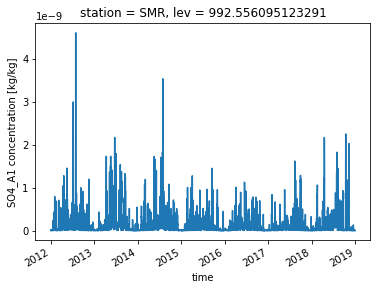

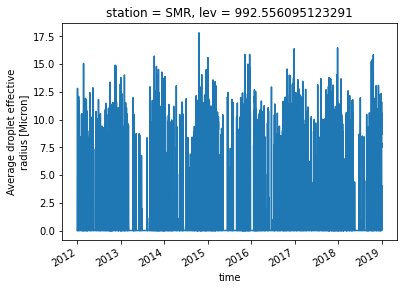

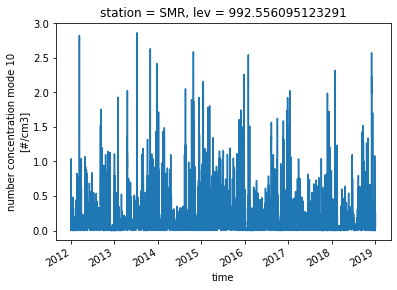

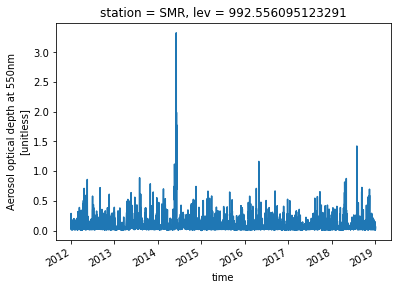

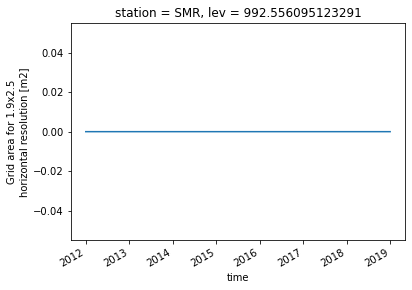

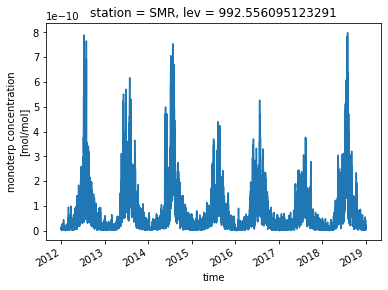

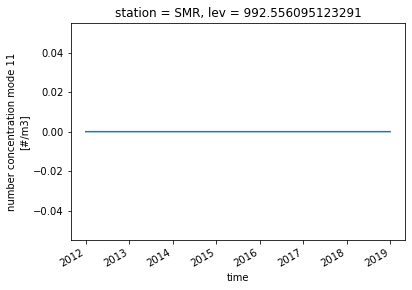

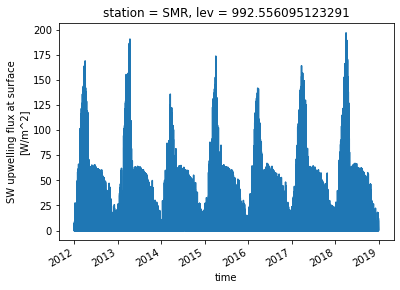

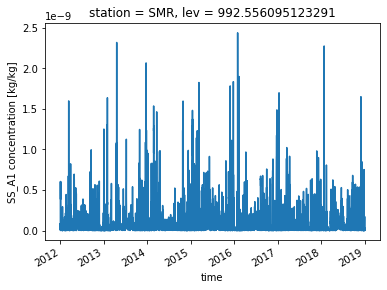

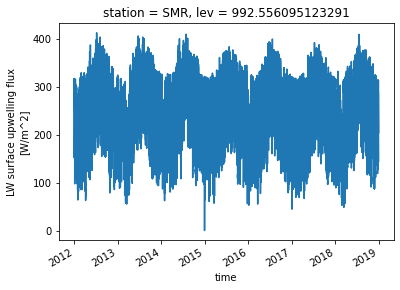

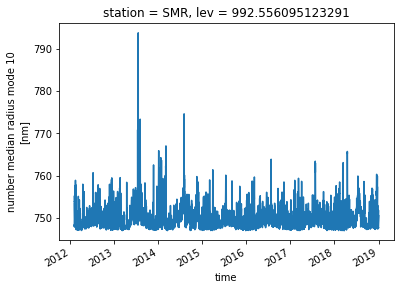

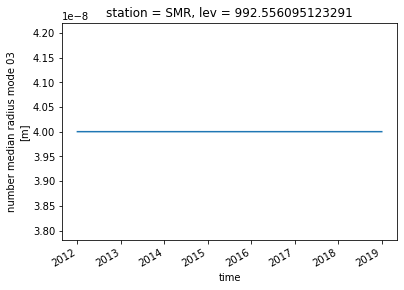

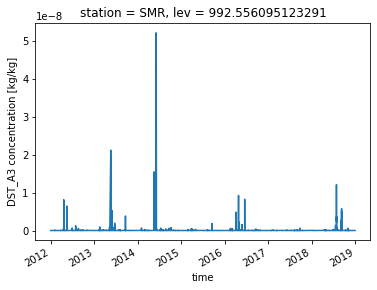

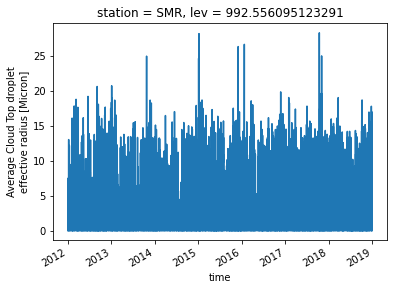

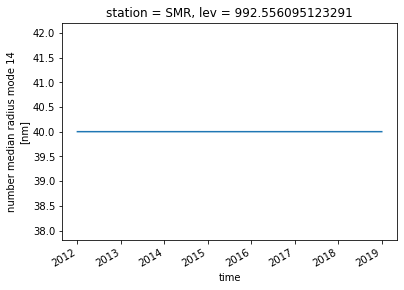

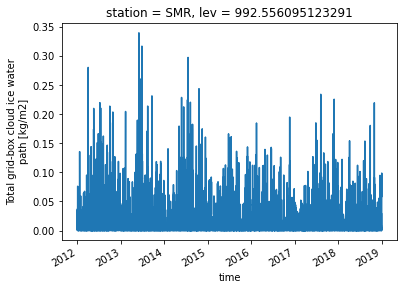

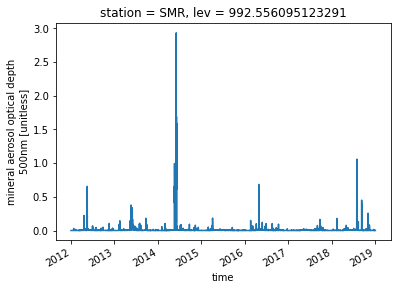

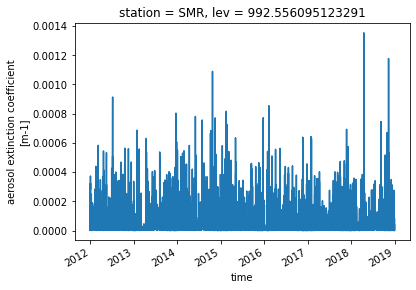

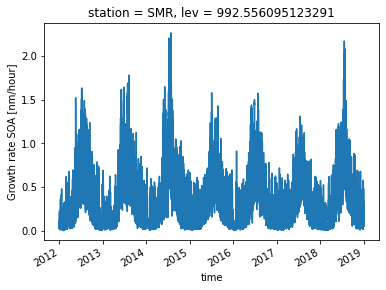

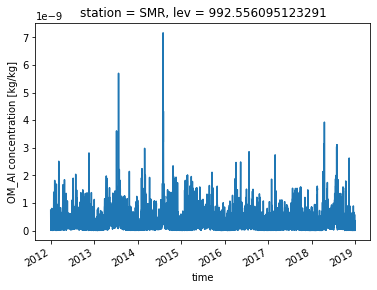

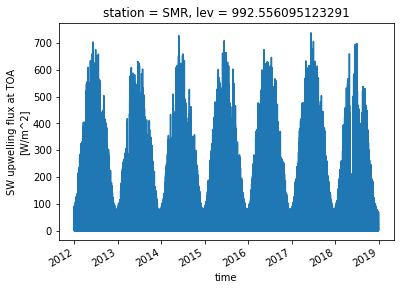

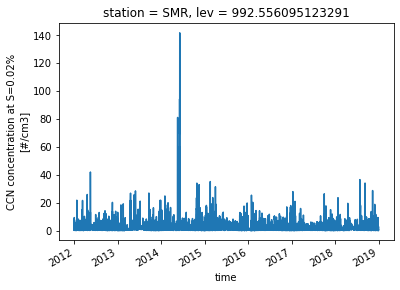

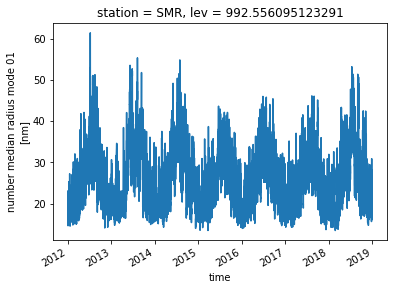

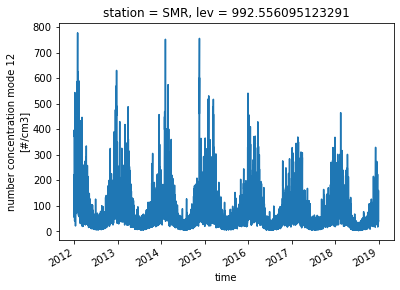

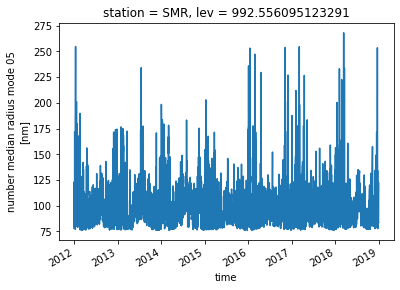

In [64]:
for v in vars_extra_ns:
    ds[v].plot()
    plt.show()